# Challenge

The following [dataset](https://docs.google.com/spreadsheets/d/1a-hCKt0KrtP4CjUfhsIMJRkbiT9LyzhiF9xSLFie5XE/edit?usp=sharing) contains information on contraceptive use by women in Indonesia. The variable we are trying to predict is the *contraceptive_used* variable which is categorical (1 indicates no use, 2 indicates long-term methods, 3 indicates short term methods)

The *age* and *number_of_children_born* variables are continuous, all other variables in the dataset are categorical.

This time, you will have to use a [gradient boosted classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier). 

Tips:

*   Set up your plot for deviance, and use it as a guideline for tweaking your model. What learning rate did you try? What tree depth? What number of trees?
*   Display the most relevant variables that influence prediction. The approach for this is similar to what we've shown in the random forest example.
*   Talking about random forests, train a random forest model to make the same prediction. Compare and contrast both models: Which one do you trust more?
*   Train an [adaboost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier), and compare it to the above 2 models.

In [1]:
# Import pandas and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

df = pd.read_csv('/Users/RyanMburu/Documents/Supervised-Learning/Decision Trees/Boosting/cmc - cmc.csv')
df

,age,education,husband_education,number_of_children_born,muslim,employed,husband_occupation,lifestyle,media_exposure,contraceptive_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [3]:
# Assuming everything is clean. we'll separate the data into dependent and independent variables

factors = df.loc[:, 'age' : 'media_exposure']
factors

,age,education,husband_education,number_of_children_born,muslim,employed,husband_occupation,lifestyle,media_exposure
0,24,2,3,3,1,1,2,3,0
1,45,1,3,10,1,1,3,4,0
2,43,2,3,7,1,1,3,4,0
3,42,3,2,9,1,1,3,3,0
4,36,3,3,8,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0
1469,33,4,4,3,1,1,1,4,0
1470,39,3,3,8,1,0,1,4,0
1471,33,3,3,4,1,0,2,2,0


In [4]:
X = factors.values
y = df['contraceptive_used'].values

In [5]:
# Split into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Will perform prediction via decision trees, where the performance will be boosted via gradient boosting

#Import our ML libraries
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble

## Normal Decision Tree

In [47]:
treee = DecisionTreeClassifier(max_depth=4, min_samples_split=30, criterion='entropy')

treee.fit(X_train, y_train)

y_pred_dt = treee.predict(X_test)

df_tree = pd.DataFrame({'OG' : y_test, 'pred' : y_pred_dt})
print(df_tree)


print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_dt))

     OG  pred
0     1     1
1     1     3
2     2     2
3     3     3
4     2     2
..   ..   ...
290   1     1
291   2     2
292   2     3
293   3     3
294   3     1

[295 rows x 2 columns]
Accuracy :  0.5186440677966102


In [48]:
# Plot the decision tree
import graphviz

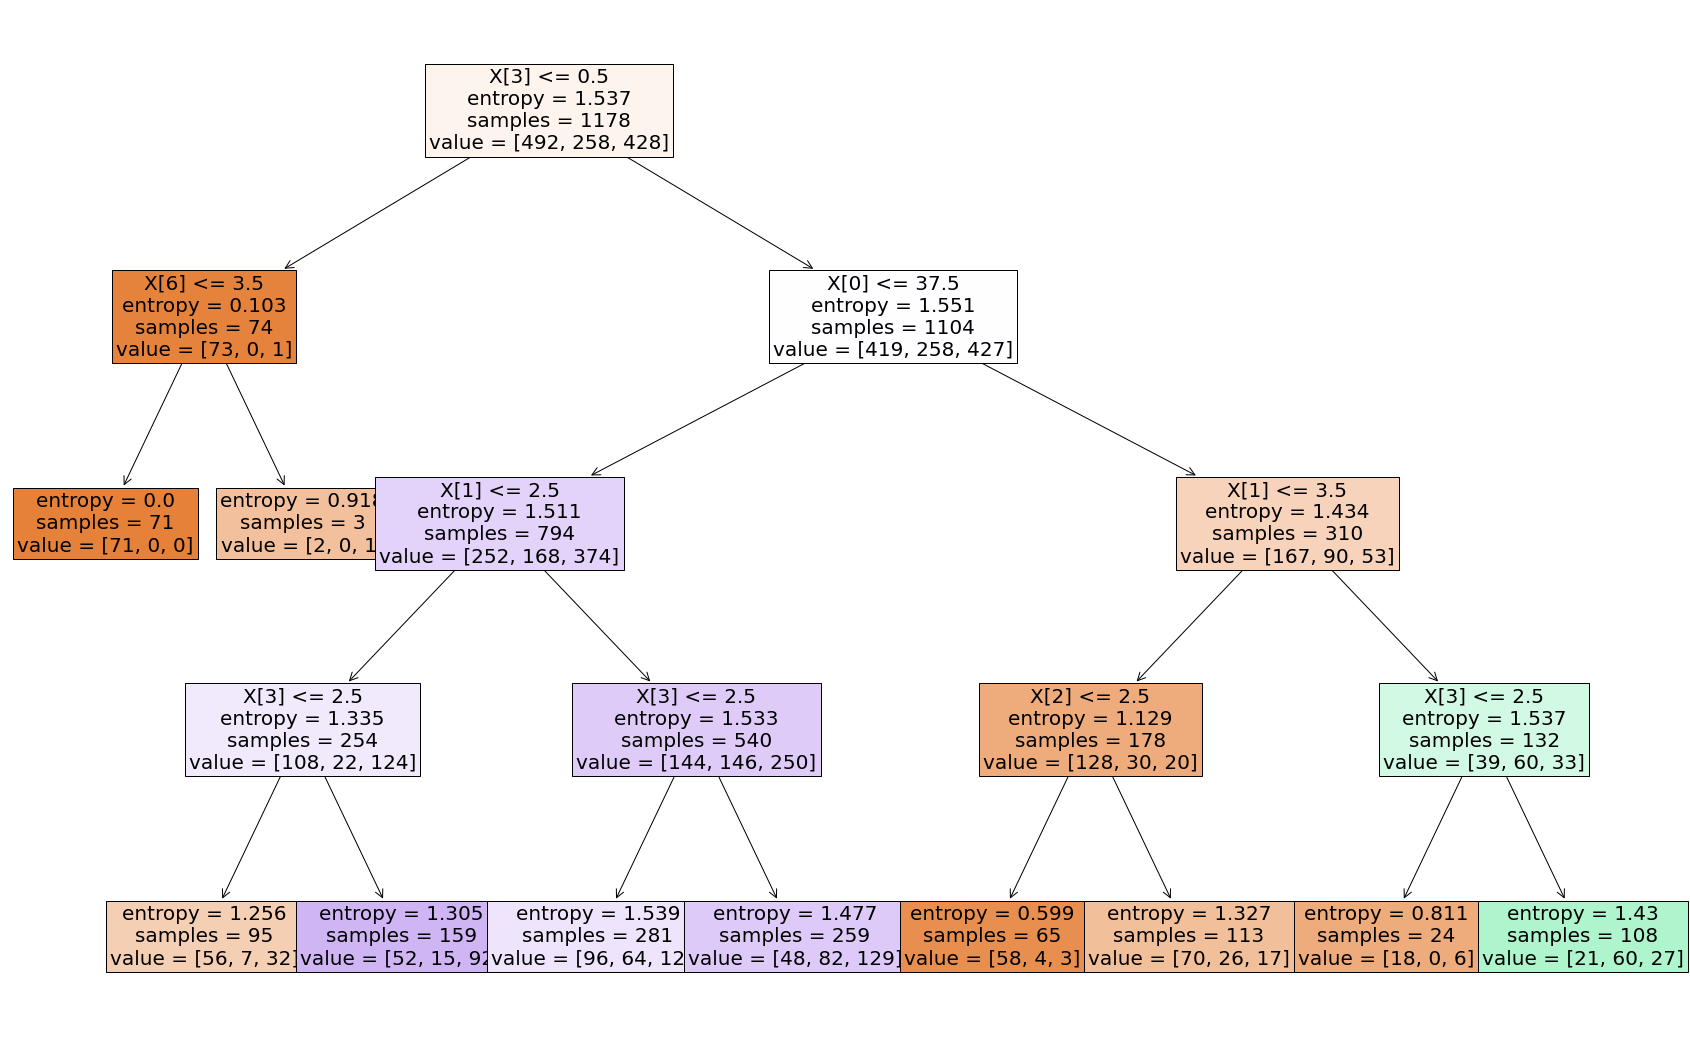

In [49]:
fig, ax = plt.subplots(figsize=(30,19))
tree.plot_tree(treee, fontsize=20, filled=True)
plt.show()

## Random Forest

In [50]:
forest = ensemble.RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=3)

forest.fit(X_train, y_train)

y_pred_for = forest.predict(X_test)

df_for = pd.DataFrame({'OG' : y_test, 'pred' : y_pred_for})
print(df_for)


print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_for))

     OG  pred
0     1     1
1     1     1
2     2     2
3     3     1
4     2     2
..   ..   ...
290   1     1
291   2     2
292   2     3
293   3     3
294   3     1

[295 rows x 2 columns]
Accuracy :  0.5423728813559322


## Model Boosting


## 1. Gradient Boosting

In [51]:
# Boost the model and perform predictions
gradient_boost = ensemble.GradientBoostingClassifier(n_estimators=150, max_depth=5, min_samples_split=20, learning_rate=0.1)

gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=20, n_estimators=150)

In [52]:
y_pred = gradient_boost.predict(X_test)

df_pred = pd.DataFrame({'OG': y_test, 'predictions' : y_pred})
df_pred

,OG,predictions
0,1,1
1,1,3
2,2,2
3,3,1
4,2,2
...,...,...
290,1,1
291,2,2
292,2,3
293,3,3


In [53]:
# test accuracy

print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.5457627118644067


## ADA Boosting

In [54]:
from sklearn.tree import DecisionTreeClassifier

ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=10))

ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

df_ada = pd.DataFrame({'OG' : y_test, 'pred' : y_pred_ada})
print(df_ada)


print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_ada))

     OG  pred
0     1     1
1     1     2
2     2     2
3     3     1
4     2     2
..   ..   ...
290   1     1
291   2     2
292   2     3
293   3     3
294   3     1

[295 rows x 2 columns]
Accuracy :  0.46779661016949153
